In [2]:
#uploading zip file of dataset
from google.colab import files
uploaded = files.upload()

Saving NEU-DET.zip to NEU-DET.zip


In [3]:
zip_path = list(uploaded.keys())[0]

In [6]:
# -----------------------------------------------------------
# STEP 2 — UNZIP DATASET
# -----------------------------------------------------------
import zipfile
import os

extract_dir = "/content/project2/NEU-DET/NEU-DET"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)

Extracted to: /content/project2/NEU-DET/NEU-DET


In [7]:
# -----------------------------------------------------------
# STEP 3 — CREATE IMAGE DATASET
# -----------------------------------------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

train_dir = os.path.join(extract_dir, "train", "images")
val_dir = os.path.join(extract_dir, "validation", "images")

# Image augmentation for training
train_gen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 1440 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [8]:
# -----------------------------------------------------------
# STEP 4 — BUILD MODEL
# -----------------------------------------------------------
from tensorflow.keras import layers, models

num_classes = train_data.num_classes

model = models.Sequential([
    layers.Input(shape=(img_size, img_size, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,214 (84.86 MB)

 Trainable params: 22,246,214 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# -----------------------------------------------------------
# STEP 5 — TRAIN MODEL
# -----------------------------------------------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - accuracy: 0.1898 - loss: 2.3574 - val_accuracy: 0.1667 - val_loss: 1.7779
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 387ms/step - accuracy: 0.2762 - loss: 1.6828 - val_accuracy: 0.3750 - val_loss: 1.7580
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 394ms/step - accuracy: 0.6243 - loss: 1.1204 - val_accuracy: 0.5139 - val_loss: 1.2028
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 381ms/step - accuracy: 0.6809 - loss: 0.8408 - val_accuracy: 0.6444 - val_loss: 1.0481
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 407ms/step - accuracy: 0.8391 - loss: 0.5015 - val_accuracy: 0.6194 - val_loss: 0.9170
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 388ms/step - accuracy: 0.8355 - loss: 0.4505 - val_accuracy: 0.5611 - val_loss: 1.3325
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 404ms/step - accuracy: 0.8909 - loss: 0.3242 - val_accuracy: 0.7111 - val_loss: 0.6762
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 380ms/step - accuracy: 0.8821 - loss: 0.3165 - val_accu

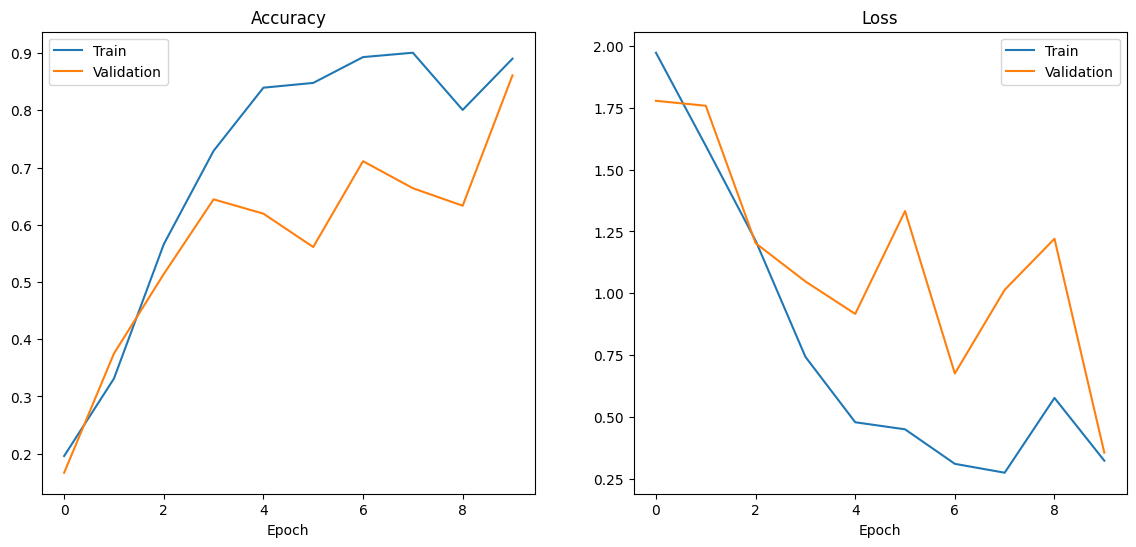

In [10]:
# -----------------------------------------------------------
# STEP 6 — PLOT ACCURACY & LOSS
# -----------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])

plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step


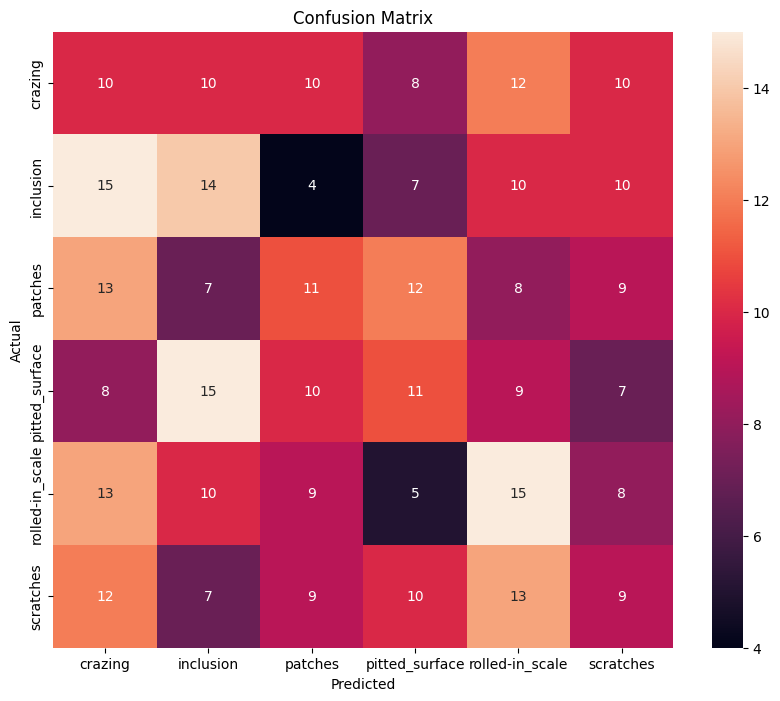


Classification Report:

                 precision    recall  f1-score   support

        crazing       0.14      0.17      0.15        60
      inclusion       0.22      0.23      0.23        60
        patches       0.21      0.18      0.19        60
 pitted_surface       0.21      0.18      0.19        60
rolled-in_scale       0.22      0.25      0.24        60
      scratches       0.17      0.15      0.16        60

       accuracy                           0.19       360
      macro avg       0.20      0.19      0.19       360
   weighted avg       0.20      0.19      0.19       360



In [11]:
# -----------------------------------------------------------
# STEP 7 — CONFUSION MATRIX
# -----------------------------------------------------------
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions
val_data.reset()
pred_probs = model.predict(val_data)
pred_labels = np.argmax(pred_probs, axis=1)

true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))
